1. Import Libraries:

In [5]:
# data processing
# -----------------------------------------------
import pandas as pd
import numpy as np
import sidetable
import json
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler
# graphics
# -----------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# warning
# ------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# columns
# ------------------------------------------------
pd.options.display.max_columns = None 
pd.options.display.max_rows = None
# Dates
# ------------------------------------------------
from datetime import date, datetime
import calendar
import holidays

---

2. Load the data

In [6]:
df = pd.read_csv(("data/01-top_100_richest.csv"))
df.head(2)

,rank,name,net_worth,bday,age,nationality
0,1,Elon Musk,$240 Billion,28-Jun-71,51.0,South Africa
1,2,Jeff Bezos,$150 Billion,12-Jan-64,58.0,United States of America


---

# 3. Basic information about data - EDA

In [7]:
# Basic information
print(f'The columns of this dataset are :') 
df.info()

The columns of this dataset are :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         100 non-null    int64  
 1   name         100 non-null    object 
 2   net_worth    100 non-null    object 
 3   bday         94 non-null     object 
 4   age          95 non-null     float64
 5   nationality  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [8]:
print(f'the columns of this dataset are:') 
df.columns

the columns of this dataset are:


Index(['rank', 'name', 'net_worth', 'bday', 'age', 'nationality'], dtype='object')

In [9]:
# to get the size of our dataset
print(f'the columns and rows of this df are:: {df.shape}')

the columns and rows of this df are:: (100, 6)


In [10]:
# to know the types of the columns
print(f'The data types of this df are:') 
pd.DataFrame(df.dtypes)

The data types of this df are:


,0
rank,int64
name,object
net_worth,object
bday,object
age,float64
nationality,object


### The main statistics

In [11]:
# Describe the data
print(f'The main statistics of the NUMERIC columns of this df are:') 
#Transposing the output of the describe function.
df.describe().T 

The main statistics of the NUMERIC columns of this df are:


,count,mean,std,min,25%,50%,75%,max
rank,100.0,50.500000,29.011492,1.0,25.75,50.5,75.25,100.0
age,95.0,68.705263,14.511825,36.0,58.00,69.0,78.50,97.0


In [12]:

print(f'The main statistics of the CATEGORICAL columns of this df are:') 
# Showing the main statistics of the CATEGORICAL columns of this df.
df.describe(include="object")

The main statistics of the CATEGORICAL columns of this df are:


,name,net_worth,bday,nationality
count,100,100,94,100
unique,100,47,94,25
top,Elon Musk,$20 Billion,28-Jun-71,United States of America
freq,1,8,1,36


---

## 4. Duplicate values

In [13]:
#Checking for duplicate values in the dataframe and summing them up.
print(f'Duplicate values of this df are:{df.duplicated().sum()}') 

Duplicate values of this df are:0


In [14]:
# The above code is checking for null values in the dataframe.
print(f'Duplicate values of this df are:')
pd.DataFrame(df.isnull().sum())

Duplicate values of this df are:


,0
rank,0
name,0
net_worth,0
bday,6
age,5
nationality,0


---

## 5. Find the Null values

In [15]:
# to get the information about null values
print(f'The null values of this df are:')
df.stb.missing()

The null values of this df are:


,missing,total,percent
bday,6,100,6.0
age,5,100,5.0
rank,0,100,0.0
name,0,100,0.0
net_worth,0,100,0.0
nationality,0,100,0.0


In [16]:
# Counting the number of null values in each column and then displaying the percentage of null values in each column.
nulls = pd.DataFrame((df.isnull().sum() * 100) / df.shape[0]).reset_index()
nulls.columns = ["column", "percentage"]
nulls.sort_values('percentage', ascending=False)# Sorting the percentage from highest to lowest.

,column,percentage
3,bday,6.0
4,age,5.0
0,rank,0.0
1,name,0.0
2,net_worth,0.0
5,nationality,0.0


In [17]:
nulls_authr= df.get(df['bday'].isnull())
nulls_authr.head()

,rank,name,net_worth,bday,age,nationality
10,11,Alain & Gerard Wertheimer,$90 Billion,NaN,NaN,France
20,21,Zhong Shanshan,$68 Billion,NaN,NaN,China
65,66,Qin Yinglin,$22 Billion,NaN,57.0,China
67,68,Wang Wei,$22 Billion,NaN,51.0,China
87,88,David & Simon Reuben,$18 Billion,NaN,NaN,United Kingdom


In [18]:
nulls_day= df.get(df['bday'].isnull())
nulls_day.head()

,rank,name,net_worth,bday,age,nationality
10,11,Alain & Gerard Wertheimer,$90 Billion,NaN,NaN,France
20,21,Zhong Shanshan,$68 Billion,NaN,NaN,China
65,66,Qin Yinglin,$22 Billion,NaN,57.0,China
67,68,Wang Wei,$22 Billion,NaN,51.0,China
87,88,David & Simon Reuben,$18 Billion,NaN,NaN,United Kingdom


In [19]:
nulls_age= df.get(df['age'].isnull())
nulls_age.head()

,rank,name,net_worth,bday,age,nationality
10,11,Alain & Gerard Wertheimer,$90 Billion,NaN,NaN,France
20,21,Zhong Shanshan,$68 Billion,NaN,NaN,China
56,57,Joseph Safra,$25 Billion,1-Sep-38,NaN,Brazil
80,81,Pallonji Mistry,$19 Billion,1-Jun-29,NaN,India
87,88,David & Simon Reuben,$18 Billion,NaN,NaN,United Kingdom


# 6.Clean and replace the null values

---

# Age

In [20]:
# Changing the age of Joseph Safra to 84.
df.loc[df['name'] =='Joseph Safra','age']='84'

In [21]:
# Changing the age of Pallonji Mistry to 93.
df.loc[df['name'] =='Pallonji Mistry','age']='93'

---

# Alain& Gerard

In [22]:
df_alain = df[df['name']=='Alain Wertheimer']
df_alain

,rank,name,net_worth,bday,age,nationality
28,29,Alain Wertheimer,$45 Billion,28-Sep-48,73.0,France


In [23]:
df_gerard = df[df['name']=='Gerard Wertheimer']
df_gerard

,rank,name,net_worth,bday,age,nationality
29,30,Gerard Wertheimer,$45 Billion,17-Apr-51,71.0,French


Como estan por separado, al estar juntos, no tiene sentido, porque es de los hombres, individual. Los borramos juntos.

In [24]:
df_bro = df[df.loc[:,'name']=='Alain & Gerard Wertheimer']
df_bro

,rank,name,net_worth,bday,age,nationality
10,11,Alain & Gerard Wertheimer,$90 Billion,NaN,NaN,France


In [25]:
pd.DataFrame(df.iloc[10])

,10
rank,11
name,Alain & Gerard Wertheimer
net_worth,$90 Billion
bday,NaN
age,NaN
nationality,France


In [26]:
#Dropping the row with index 10.
df.drop([10],axis= 0, inplace=True)

---

In [27]:
df.fillna({'bday':'unknow','age':'unknow'}, inplace=True)

In [28]:
pd.DataFrame(df.iloc[19])

,20
rank,21
name,Zhong Shanshan
net_worth,$68 Billion
bday,unknow
age,unknow
nationality,China


In [29]:
df.loc[df['name'] =='Zhong Shanshan','bday']='8-Dec-54'

In [30]:
pd.DataFrame(df.iloc[19])

,20
rank,21
name,Zhong Shanshan
net_worth,$68 Billion
bday,8-Dec-54
age,unknow
nationality,China


In [31]:
df.loc[df['name'] =='Zhong Shanshan','age']='68'

In [32]:
pd.DataFrame(df.iloc[19])

,20
rank,21
name,Zhong Shanshan
net_worth,$68 Billion
bday,8-Dec-54
age,68
nationality,China


- bday : 28-Dec-1954
- age : 68

---

In [33]:
pd.DataFrame(df.iloc[64])

,65
rank,66
name,Qin Yinglin
net_worth,$22 Billion
bday,unknow
age,57.0
nationality,China


In [34]:
df.loc[df['name'] =='Qin Yinglin','bday']='1-Dec-65'

In [35]:
pd.DataFrame(df.iloc[64])

,65
rank,66
name,Qin Yinglin
net_worth,$22 Billion
bday,1-Dec-65
age,57.0
nationality,China


Qin Yinglin
- bday : 1965
- age : 57

---

Wang Wei
- bday : 1970
- age : 52

In [36]:
pd.DataFrame(df.iloc[66])


,67
rank,68
name,Wang Wei
net_worth,$22 Billion
bday,unknow
age,51.0
nationality,China


In [37]:
df.loc[df['name'] =='Wang Wei','bday']='1-Dec-70'

In [38]:
df.loc[df['name'] =='Wang Wei','age']='52'

In [39]:
pd.DataFrame(df.iloc[66])

,67
rank,68
name,Wang Wei
net_worth,$22 Billion
bday,1-Dec-70
age,52
nationality,China


---

David & Simon Reuben

In [40]:
df_brother = df[df['name']=='David & Simon Reuben']
df_brother

,rank,name,net_worth,bday,age,nationality
87,88,David & Simon Reuben,$18 Billion,unknow,unknow,United Kingdom


In [41]:
df_david = df[df['name']=='Reuben']
df_david

,rank,name,net_worth,bday,age,nationality


In [42]:
df_simon = df[df['name']=='Simon Reuben']
df_simon

,rank,name,net_worth,bday,age,nationality


In [43]:
pd.DataFrame(df.iloc[86])


,87
rank,88
name,David & Simon Reuben
net_worth,$18 Billion
bday,unknow
age,unknow
nationality,United Kingdom


Simon 
- 1942
- 80

In [44]:
df.loc[df['name'] =='David & Simon Reuben','bday']='01-Dec-42'

In [45]:
df.loc[df['name'] =='David & Simon Reuben','age']='80'

In [46]:
df.loc[df['name'] =='David & Simon Reuben','name']='Simon Reuben'

In [47]:
pd.DataFrame(df.iloc[86])

,87
rank,88
name,Simon Reuben
net_worth,$18 Billion
bday,01-Dec-42
age,80
nationality,United Kingdom


In [48]:
pd.DataFrame(df.iloc[89])

,90
rank,91
name,Lukas Walton
net_worth,$18 Billion
bday,unknow
age,36.0
nationality,United States of America


Lucas Walton
- 19-Sep-1986

In [49]:
df.loc[df['name'] =='Lukas Walton','bday']='19-Sep-86'

---

In [50]:
print(f'The null values of this df are:')
df.stb.missing()

The null values of this df are:


,missing,total,percent
rank,0,99,0.0
name,0,99,0.0
net_worth,0,99,0.0
bday,0,99,0.0
age,0,99,0.0
nationality,0,99,0.0


---

# 7. Know the datatypes

In [51]:
print(f'The data types of this df are:') 
pd.DataFrame(df.dtypes)

The data types of this df are:


,0
rank,int64
name,object
net_worth,object
bday,object
age,object
nationality,object


# Split  bday

In [52]:
#The above code is splitting the bday column into three columns, day-bday, month_bday, and year_bday.
df[['day-bday','month_bday','year_bday']]= df.bday.str.split(pat ='-', expand = True)

In [53]:
df.head()

,rank,name,net_worth,bday,age,nationality,day-bday,month_bday,year_bday
0,1,Elon Musk,$240 Billion,28-Jun-71,51.0,South Africa,28,Jun,71
1,2,Jeff Bezos,$150 Billion,12-Jan-64,58.0,United States of America,12,Jan,64
2,3,Gautam Adani,$138 Billion,24-Jun-62,60.0,India,24,Jun,62
3,4,Bernard Arnault,$135 Billion,5-Mar-49,73.0,France,5,Mar,49
4,5,Bill Gates,$118 Billion,28-Oct-55,66.0,United States of America,28,Oct,55


In [54]:
#Splitting the net_worth column into two columns, one called billion and the other called word.
df[['billion','word']]= df.net_worth.str.split(pat =' ', expand = True)

In [55]:
df.head()

,rank,name,net_worth,bday,age,nationality,day-bday,month_bday,year_bday,billion,word
0,1,Elon Musk,$240 Billion,28-Jun-71,51.0,South Africa,28,Jun,71,$240,Billion
1,2,Jeff Bezos,$150 Billion,12-Jan-64,58.0,United States of America,12,Jan,64,$150,Billion
2,3,Gautam Adani,$138 Billion,24-Jun-62,60.0,India,24,Jun,62,$138,Billion
3,4,Bernard Arnault,$135 Billion,5-Mar-49,73.0,France,5,Mar,49,$135,Billion
4,5,Bill Gates,$118 Billion,28-Oct-55,66.0,United States of America,28,Oct,55,$118,Billion


In [56]:
#Dropping the column 'word' from the dataframe.
df.drop(['word'],axis=1,inplace=True)

In [57]:
df.head()

,rank,name,net_worth,bday,age,nationality,day-bday,month_bday,year_bday,billion
0,1,Elon Musk,$240 Billion,28-Jun-71,51.0,South Africa,28,Jun,71,$240
1,2,Jeff Bezos,$150 Billion,12-Jan-64,58.0,United States of America,12,Jan,64,$150
2,3,Gautam Adani,$138 Billion,24-Jun-62,60.0,India,24,Jun,62,$138
3,4,Bernard Arnault,$135 Billion,5-Mar-49,73.0,France,5,Mar,49,$135
4,5,Bill Gates,$118 Billion,28-Oct-55,66.0,United States of America,28,Oct,55,$118


In [58]:
#Replacing the $ sign with nothing.
df["billion"] = df["billion"].apply(lambda x: x.replace("$",""))

In [59]:
df.head()

,rank,name,net_worth,bday,age,nationality,day-bday,month_bday,year_bday,billion
0,1,Elon Musk,$240 Billion,28-Jun-71,51.0,South Africa,28,Jun,71,240
1,2,Jeff Bezos,$150 Billion,12-Jan-64,58.0,United States of America,12,Jan,64,150
2,3,Gautam Adani,$138 Billion,24-Jun-62,60.0,India,24,Jun,62,138
3,4,Bernard Arnault,$135 Billion,5-Mar-49,73.0,France,5,Mar,49,135
4,5,Bill Gates,$118 Billion,28-Oct-55,66.0,United States of America,28,Oct,55,118


In [60]:
df.dtypes

rank            int64
name           object
net_worth      object
bday           object
age            object
nationality    object
day-bday       object
month_bday     object
year_bday      object
billion        object
dtype: object

In [61]:
#Converting the billion column to a float64 data type.
df['billion']= df['billion'].astype('float64')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 99
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         99 non-null     int64  
 1   name         99 non-null     object 
 2   net_worth    99 non-null     object 
 3   bday         99 non-null     object 
 4   age          99 non-null     object 
 5   nationality  99 non-null     object 
 6   day-bday     99 non-null     object 
 7   month_bday   99 non-null     object 
 8   year_bday    99 non-null     object 
 9   billion      99 non-null     float64
dtypes: float64(1), int64(1), object(8)
memory usage: 8.5+ KB


In [63]:
#Converting the data type of the column 'age' to integer.
df['age']= df['age'].astype('int64')

In [64]:
#Converting the column 'day-bday' to an integer.
df['day-bday']= df['day-bday'].astype('int64')

In [65]:
df['day-bday'].dtypes

dtype('int64')

In [66]:
#Converting the data type of the column 'year_bday' to integer.
df['year_bday']= df['year_bday'].astype('int64')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 99
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         99 non-null     int64  
 1   name         99 non-null     object 
 2   net_worth    99 non-null     object 
 3   bday         99 non-null     object 
 4   age          99 non-null     int64  
 5   nationality  99 non-null     object 
 6   day-bday     99 non-null     int64  
 7   month_bday   99 non-null     object 
 8   year_bday    99 non-null     int64  
 9   billion      99 non-null     float64
dtypes: float64(1), int64(4), object(5)
memory usage: 8.5+ KB


---

## 8.Duplicate Values after Null Value

In [68]:
print(f'Duplicate values of this df are:')
pd.DataFrame(df.isnull().sum())

Duplicate values of this df are:


,0
rank,0
name,0
net_worth,0
bday,0
age,0
nationality,0
day-bday,0
month_bday,0
year_bday,0
billion,0


---

# 9. Value_counts and unique values in the data

In [69]:
# Creating a function that takes a column as an argument and returns a dataframe with the unique values and their frequencies.
def frecuency(col):
    return pd.DataFrame(df[col].value_counts())

In [70]:
 #Creating a function that takes a column name as an argument and returns a dataframe of the unique values in that column.
def values(col):
    return pd.DataFrame(df[col].unique())

In [71]:
df.columns

Index(['rank', 'name', 'net_worth', 'bday', 'age', 'nationality', 'day-bday',
       'month_bday', 'year_bday', 'billion'],
      dtype='object')

---

In [72]:
frecuency('rank')

,rank
1,1
76,1
74,1
73,1
72,1
71,1
70,1
69,1
68,1
67,1


In [73]:
frecuency('name')

,name
Elon Musk,1
John Menard,1
Salman bin Abdulaziz Al Saud,1
Sir Evelyn De Rothschild,1
Andrey Melnichenko,1
Leonard Lauder,1
Aliko Dangote,1
James Dyson,1
Wang Wei,1
James Simons,1


In [74]:
frecuency('net_worth')

,net_worth
$20 Billion,8
$17 Billion,6
$19 Billion,6
$18 Billion,5
$22 Billion,5
$70 Billion,5
$30 Billion,4
$68 Billion,3
$24 Billion,3
$25 Billion,3


In [75]:
frecuency('bday')

,bday
28-Jun-71,1
22-Jan-40,1
31-Dec-35,1
29-Aug-31,1
8-Mar-72,1
19-Mar-33,1
10-Apr-57,1
2-May-47,1
1-Dec-70,1
25-Apr-38,1


In [76]:
frecuency('age')

,age
86,6
65,6
60,5
82,4
76,4
77,4
57,4
66,4
73,4
67,3


In [77]:
frecuency('nationality')

,nationality
United States of America,36
China,11
Russia,9
India,5
France,5
United Kingdom,4
Japan,4
Brazil,3
Germany,3
Saudi Arabia,2


---

In [78]:
df.columns

Index(['rank', 'name', 'net_worth', 'bday', 'age', 'nationality', 'day-bday',
       'month_bday', 'year_bday', 'billion'],
      dtype='object')

In [79]:
values('rank')

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [80]:
values('name')

,0
0,Elon Musk
1,Jeff Bezos
2,Gautam Adani
3,Bernard Arnault
4,Bill Gates
5,Warren Buffett
6,Larry Page
7,Sergey Brin
8,Steve Ballmer
9,Larry Ellison


In [81]:
values('net_worth')

,0
0,$240 Billion
1,$150 Billion
2,$138 Billion
3,$135 Billion
4,$118 Billion
5,$101 Billion
6,$100 Billion
7,$96 Billion
8,$94 Billion
9,$93 Billion


In [82]:
values('bday')

,0
0,28-Jun-71
1,12-Jan-64
2,24-Jun-62
3,5-Mar-49
4,28-Oct-55
5,30-Aug-30
6,26-Mar-73
7,21-Aug-73
8,24-Mar-56
9,17-Aug-44


In [83]:
values('age')

,0
0,51
1,58
2,60
3,73
4,66
5,92
6,49
7,48
8,78
9,65


In [84]:
values('nationality')

,0
0,South Africa
1,United States of America
2,India
3,France
4,Mexico
5,Russia
6,Spain
7,China
8,Canada
9,French


---

In [85]:
categorics = df.select_dtypes(include = "object")
categorics.head(2)

,name,net_worth,bday,nationality,month_bday
0,Elon Musk,$240 Billion,28-Jun-71,South Africa,Jun
1,Jeff Bezos,$150 Billion,12-Jan-64,United States of America,Jan


In [86]:
numerics = df.select_dtypes(np.number)
numerics.head(2)

,rank,age,day-bday,year_bday,billion
0,1,51,28,71,240.0
1,2,58,12,64,150.0


---

# 10. Outliers

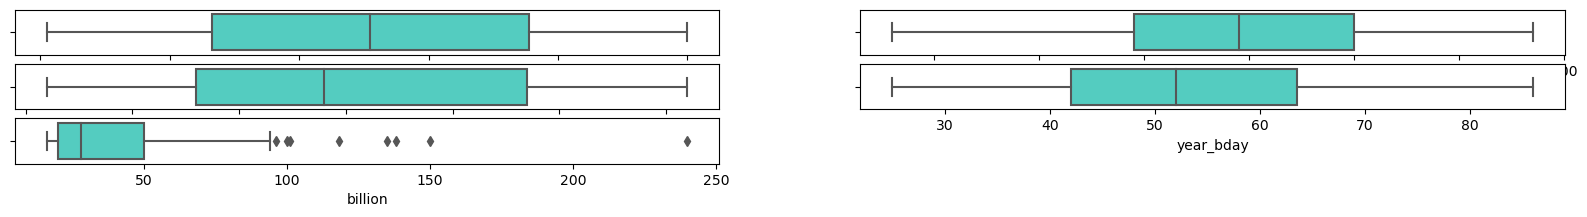

In [87]:
fig, axes = plt.subplots(3,2, figsize=(20,2))
axes = axes.flat
for indice, columna in enumerate(numerics.columns):
    sns.boxplot(x = numerics[columna], data = df, ax=axes[indice], color = "turquoise"); # para trazar una línea de densidad  
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show();

In [88]:
categorics.head(2)

,name,net_worth,bday,nationality,month_bday
0,Elon Musk,$240 Billion,28-Jun-71,South Africa,Jun
1,Jeff Bezos,$150 Billion,12-Jan-64,United States of America,Jan


In [89]:
numerics.head(2)

,rank,age,day-bday,year_bday,billion
0,1,51,28,71,240.0
1,2,58,12,64,150.0


# 11. Visualize the data

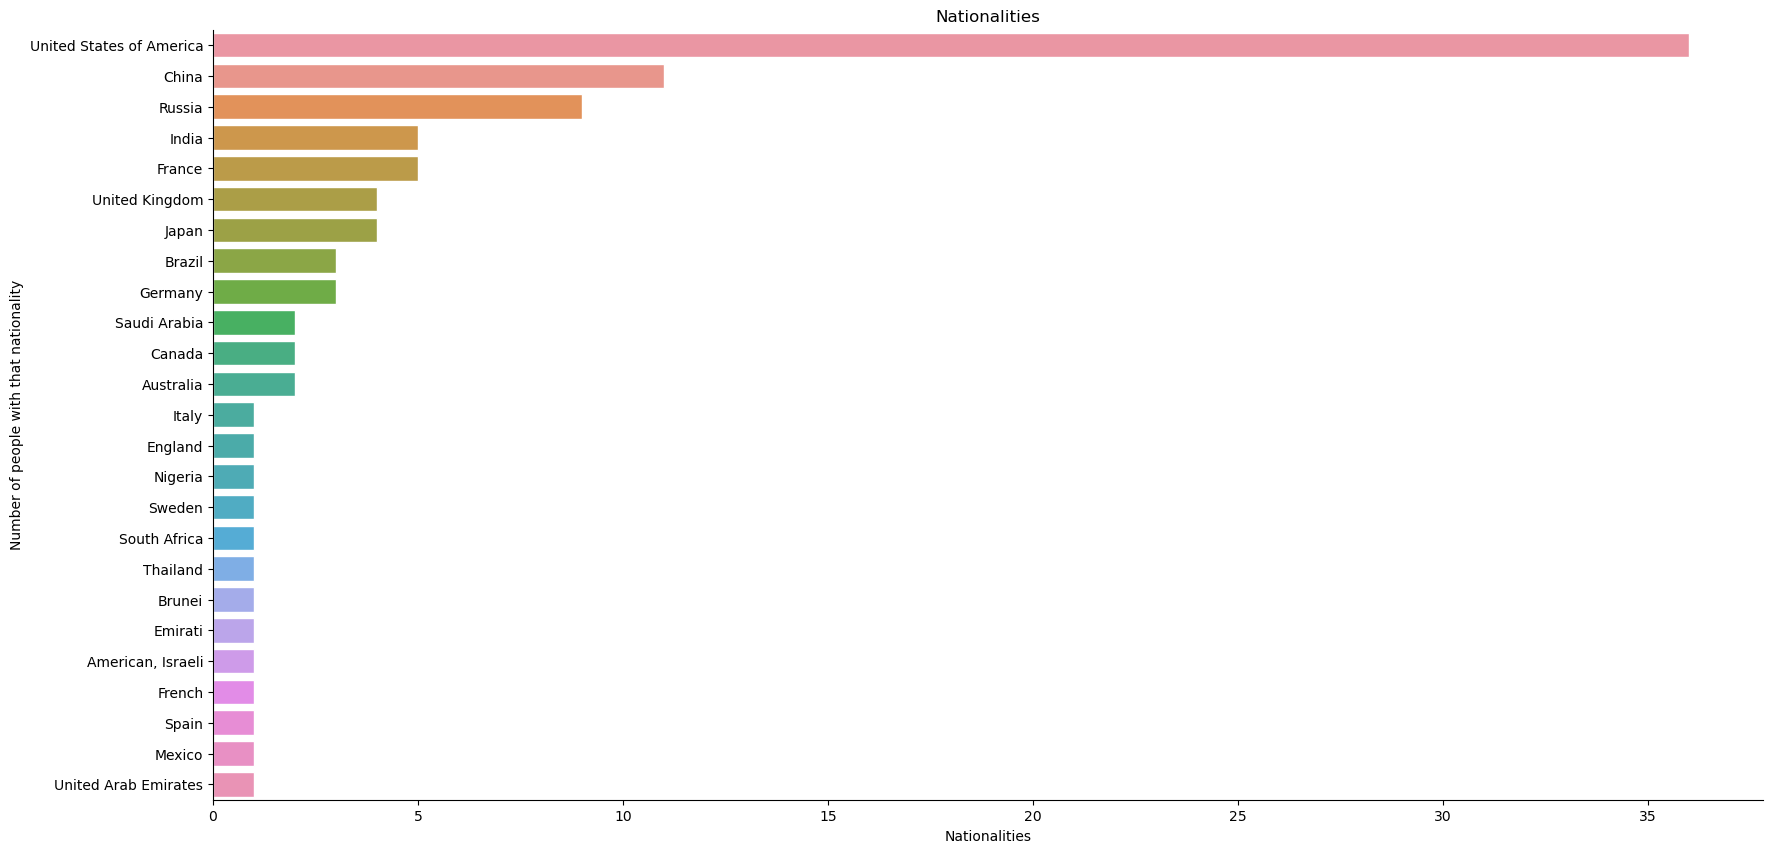

In [90]:
plt.figure(figsize = (20,10))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.set_theme(style="darkgrid")
sns.countplot(y='nationality', 
                data= df,
                order = df['nationality'].value_counts().index)


plt.title('Nationalities')
plt.xlabel('Nationalities')
plt.ylabel('Number of people with that nationality') 
plt.savefig("graphics/00-nationality.png")
plt.show(); 

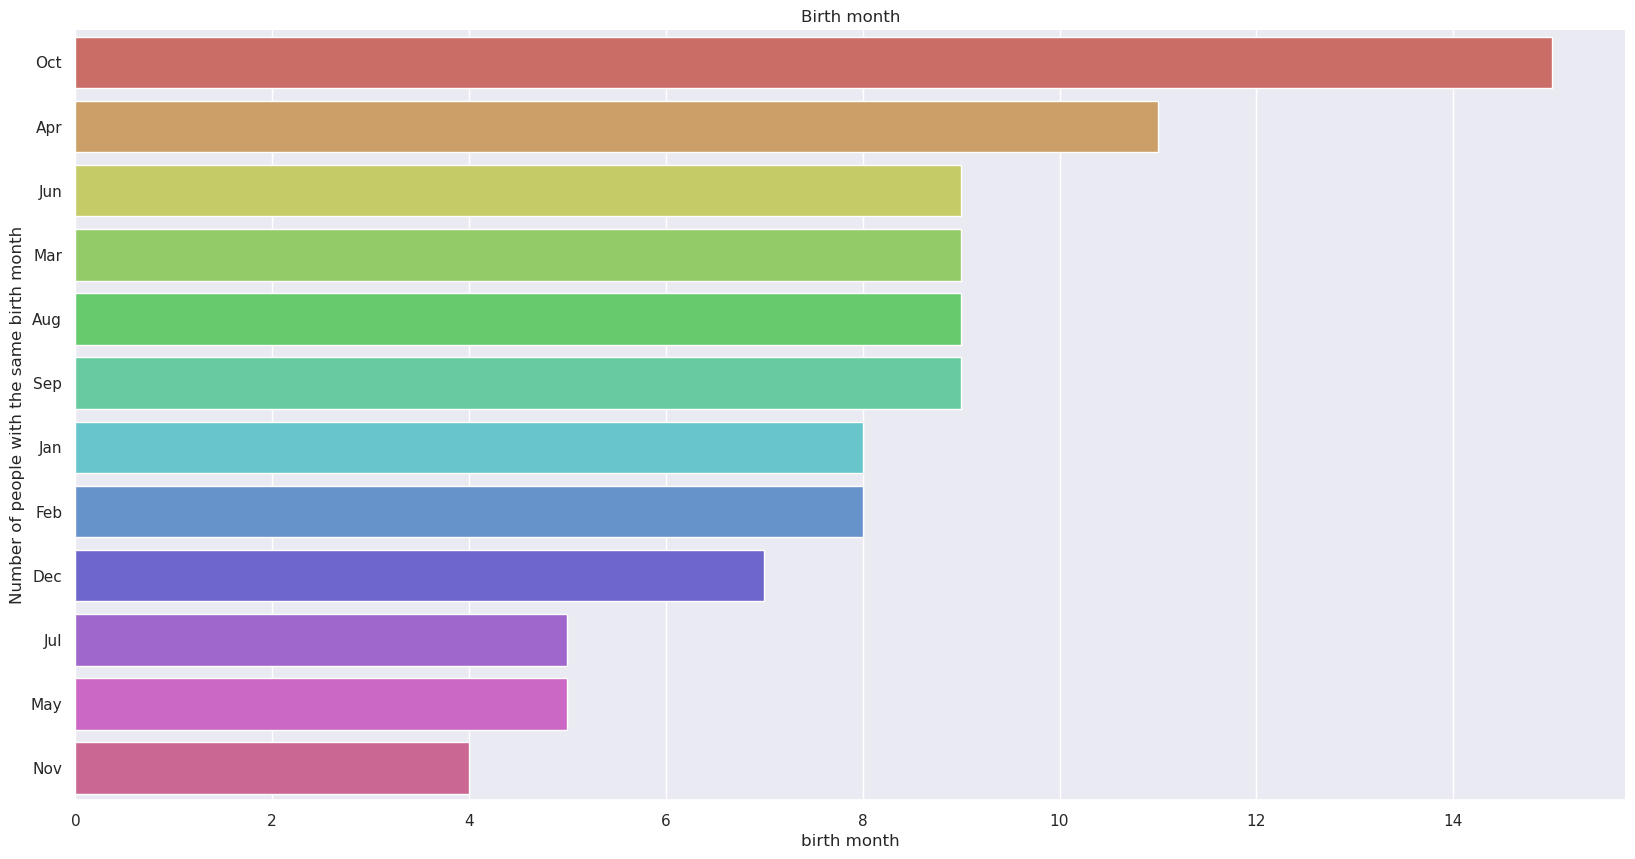

In [91]:
plt.figure(figsize = (20,10))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.set_theme(style="darkgrid")
sns.countplot(y='month_bday', 
                data= df,
                order = df['month_bday'].value_counts().index,
                palette = 'hls')


plt.title('Birth month')
plt.xlabel('birth month')
plt.ylabel('Number of people with the same birth month') 
plt.savefig("graphics/01-month.png")
plt.show(); 

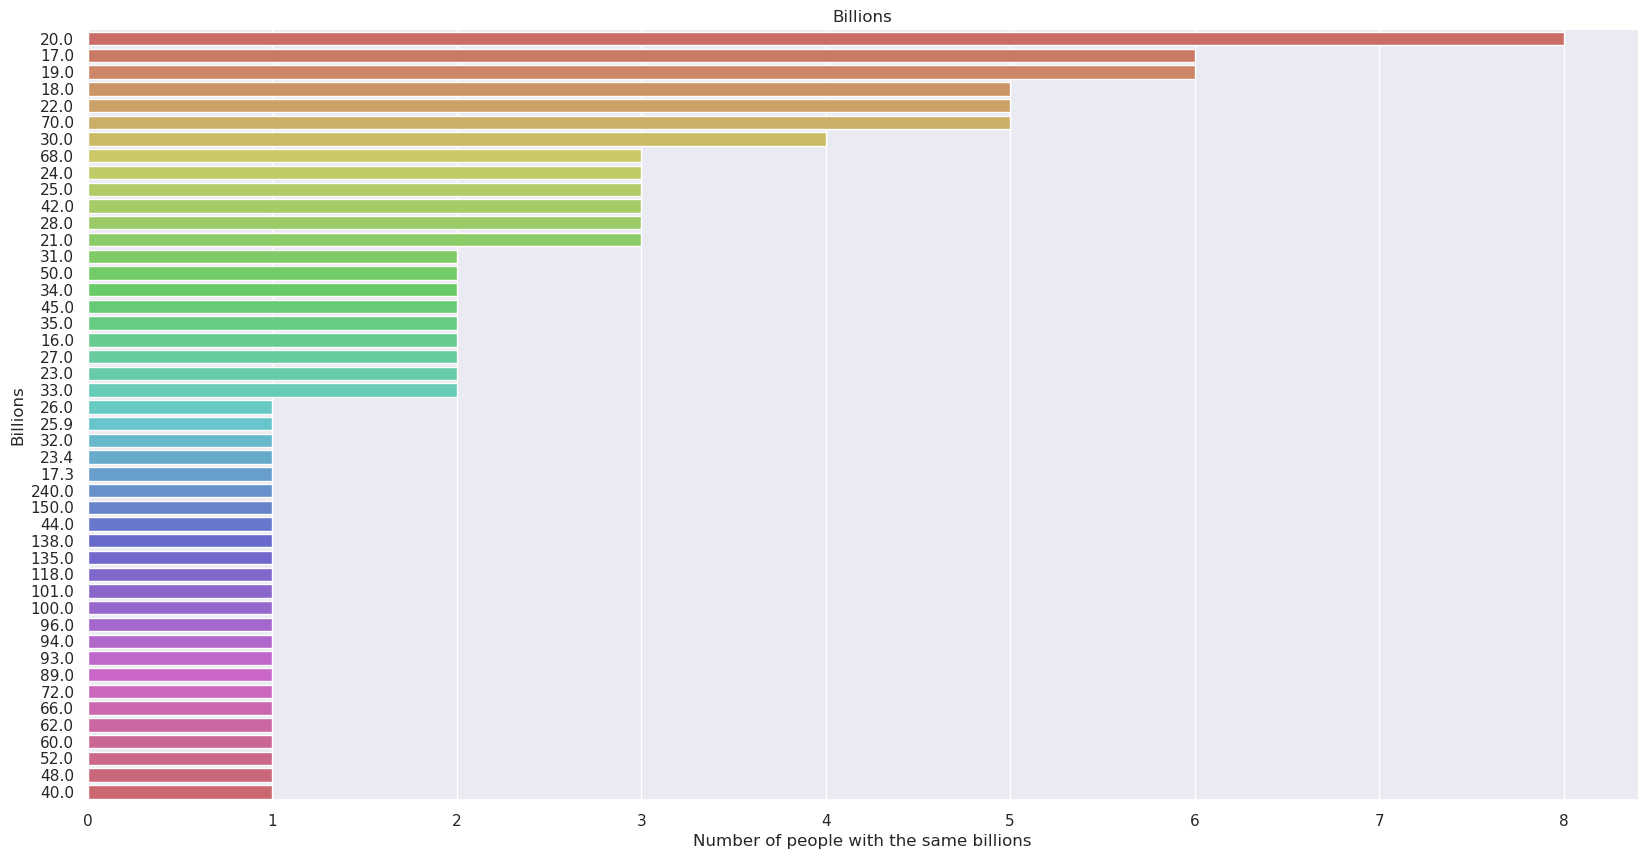

In [92]:
plt.figure(figsize = (20,10))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.set_theme(style="darkgrid")
sns.countplot(y='billion', 
                data= df,
                order = df['billion'].value_counts().index,
                palette = 'hls')
plt.title('Billions')
plt.xlabel('Number of people with the same billions')
plt.ylabel('Billions') 
plt.savefig("graphics/02-billions.png")
plt.show(); 

---

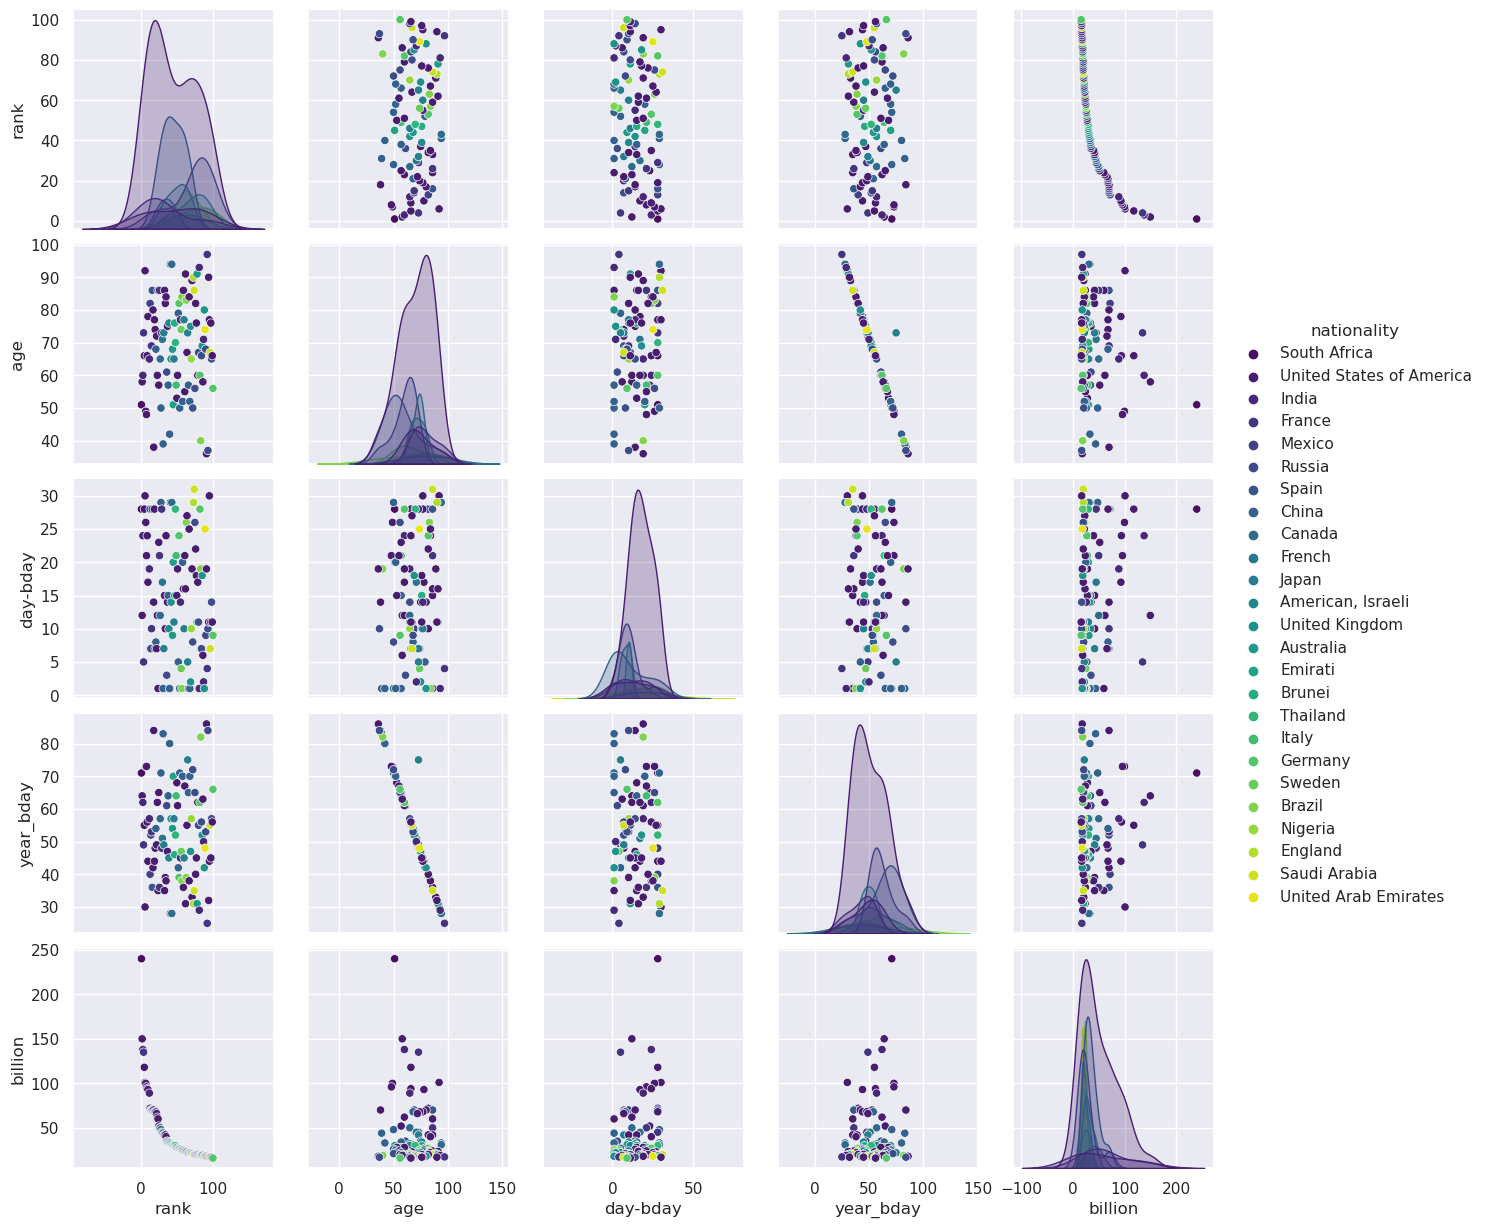

In [93]:
sns.pairplot(df,hue='nationality',palette='viridis')
plt.savefig("graphics/03-pairplot.png");

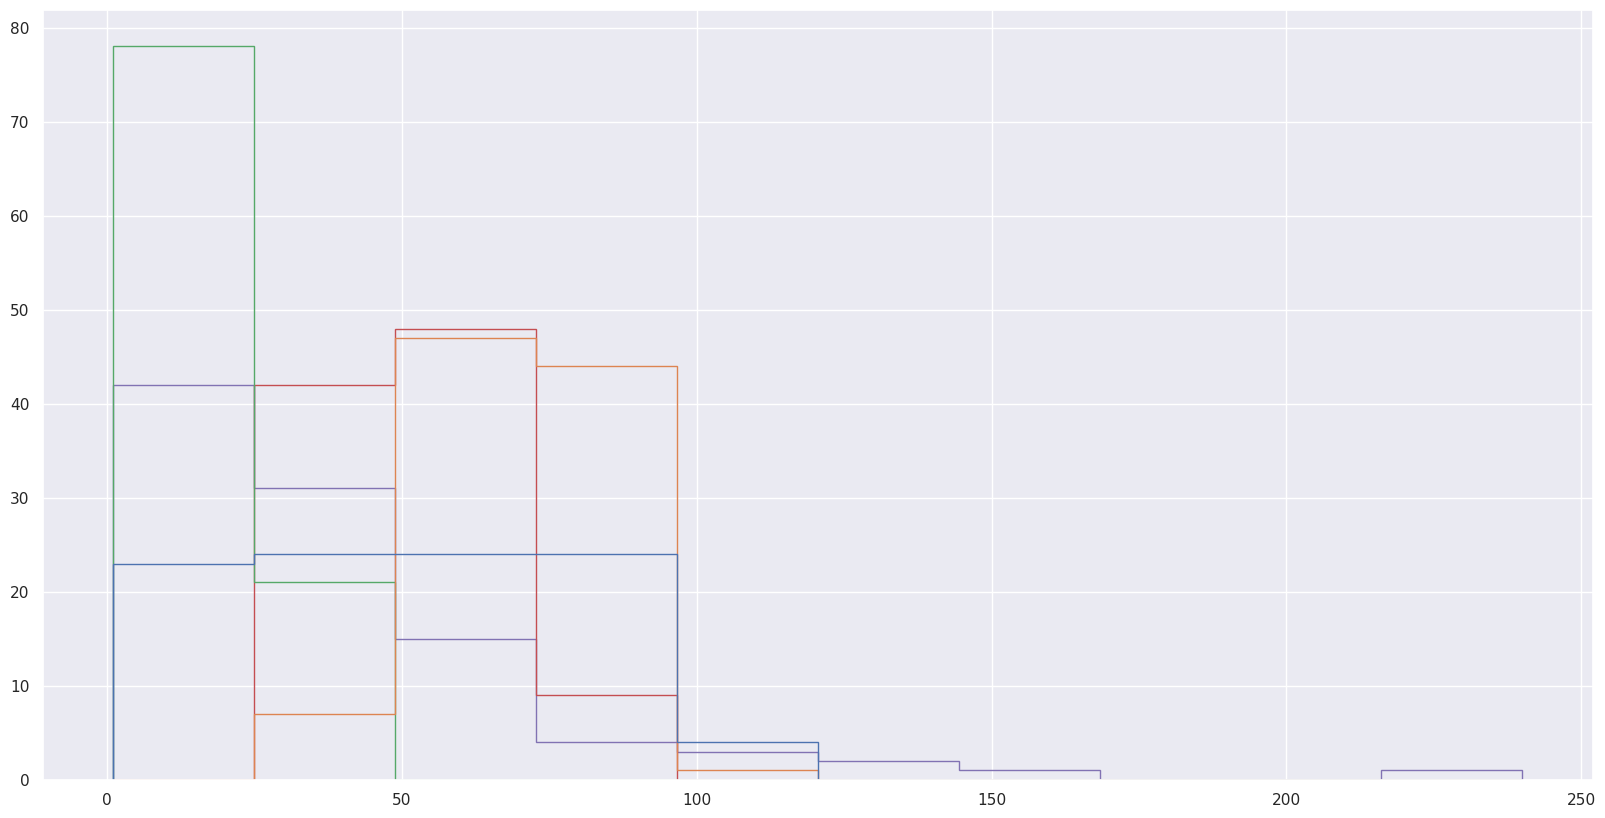

In [94]:
plt.figure(figsize = (20,10))
plt.hist(numerics, bins = 10, histtype = 'step')
plt.savefig("graphics/04-numerics.png")
plt.show()

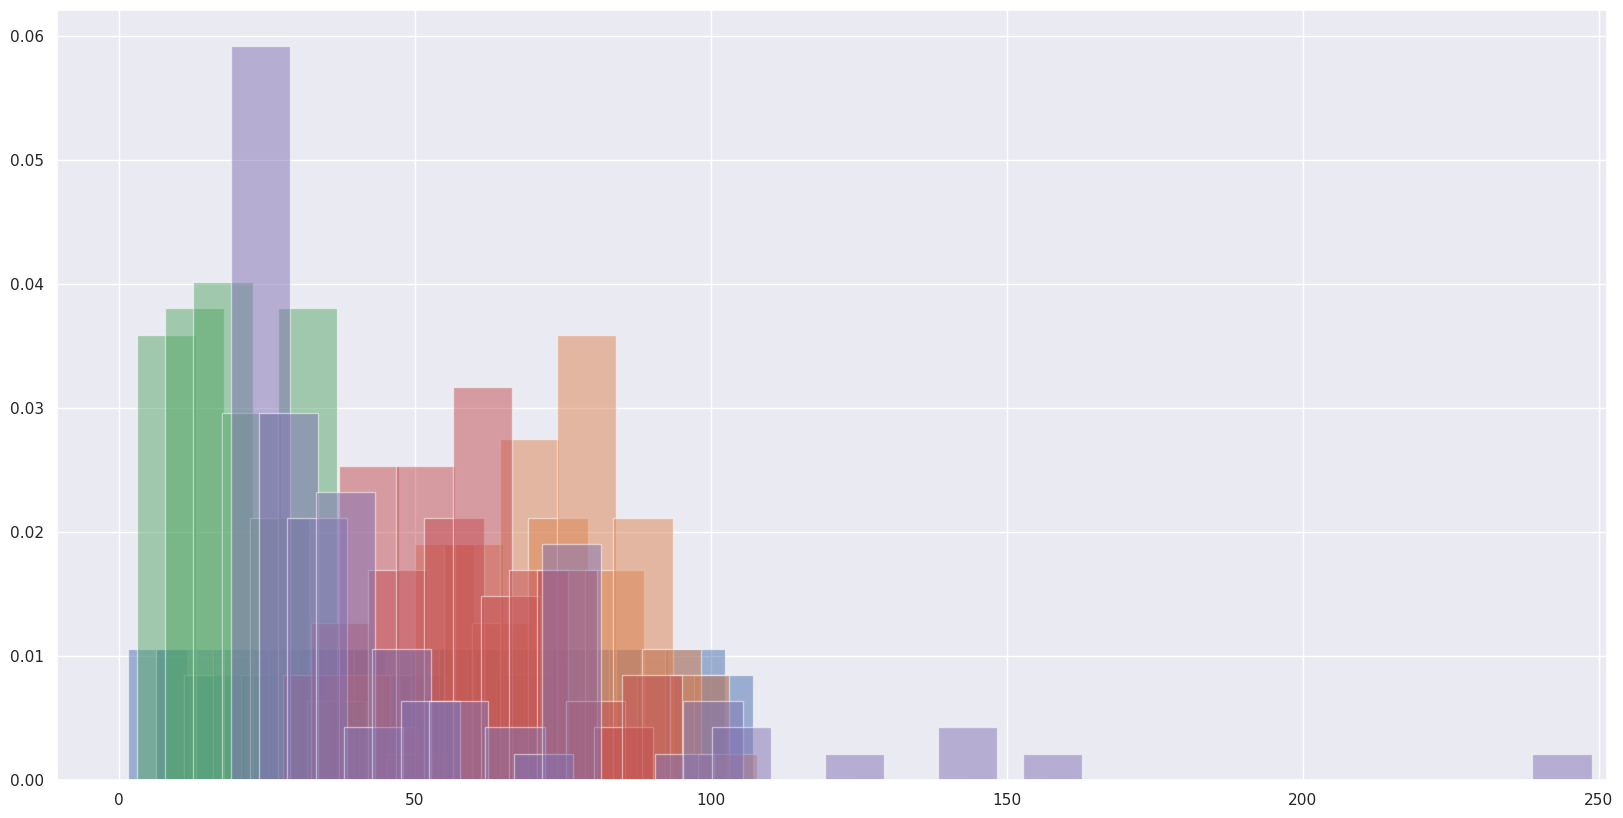

In [95]:
plt.figure(figsize = (20,10))
plt.hist(numerics, bins = 50, width = 10,alpha=0.5, density=True)
df.sort_values(by='billion', ascending=False, inplace=True)
plt.savefig("graphics/05-numerics.png")
plt.show();

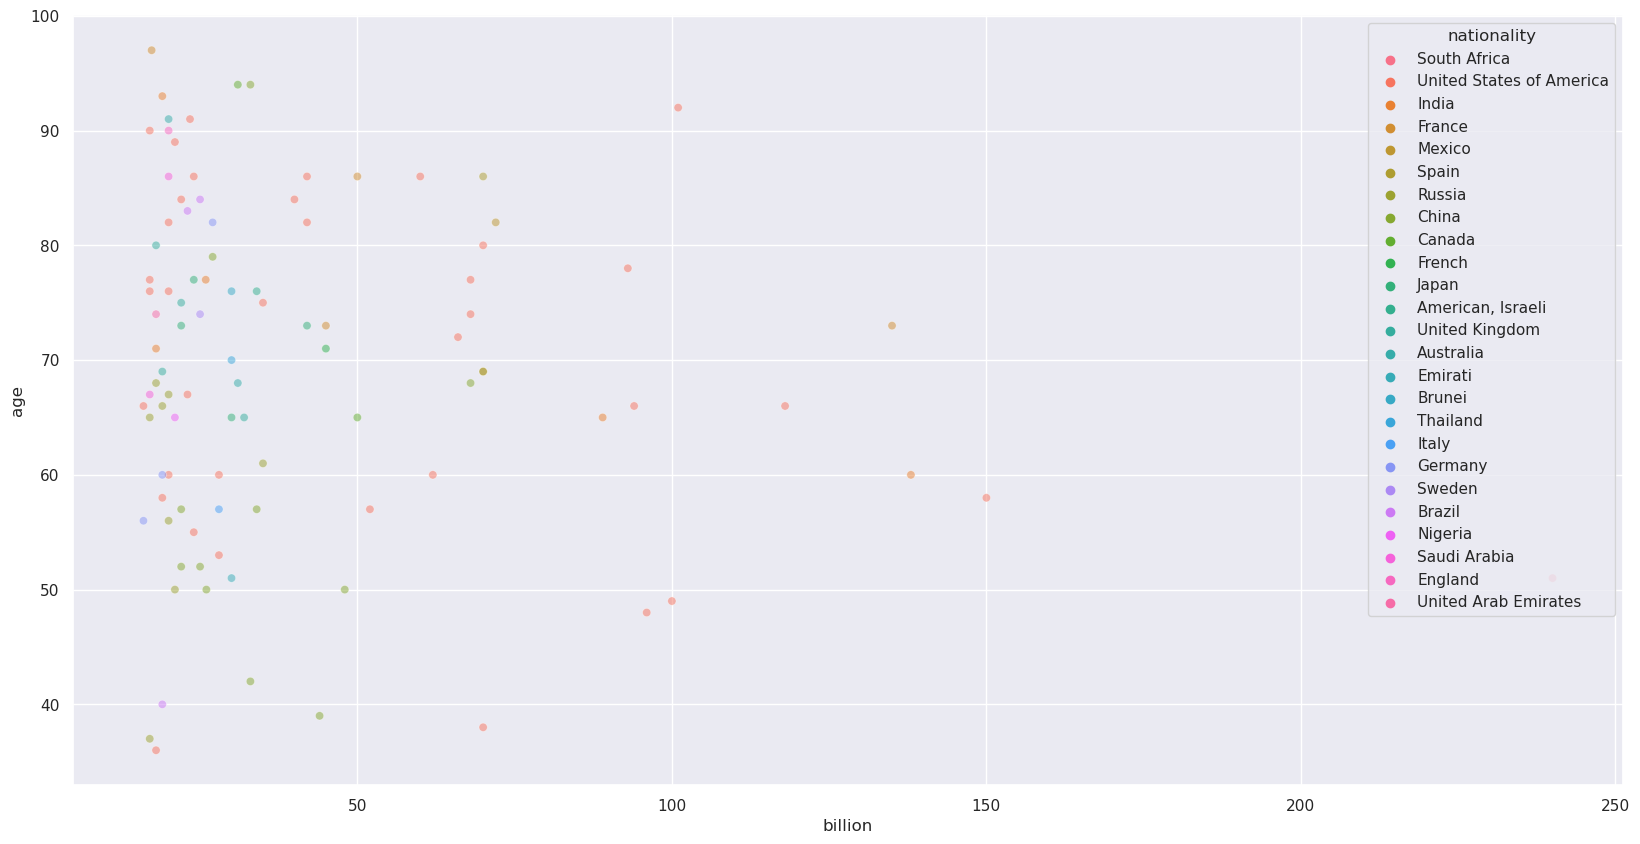

In [96]:
plt.figure(figsize = (20,10))
sns.scatterplot(data = df, x = 'billion',y= 'age', hue = 'nationality',alpha=0.5)
plt.savefig("graphics/06-age.png")
plt.show();

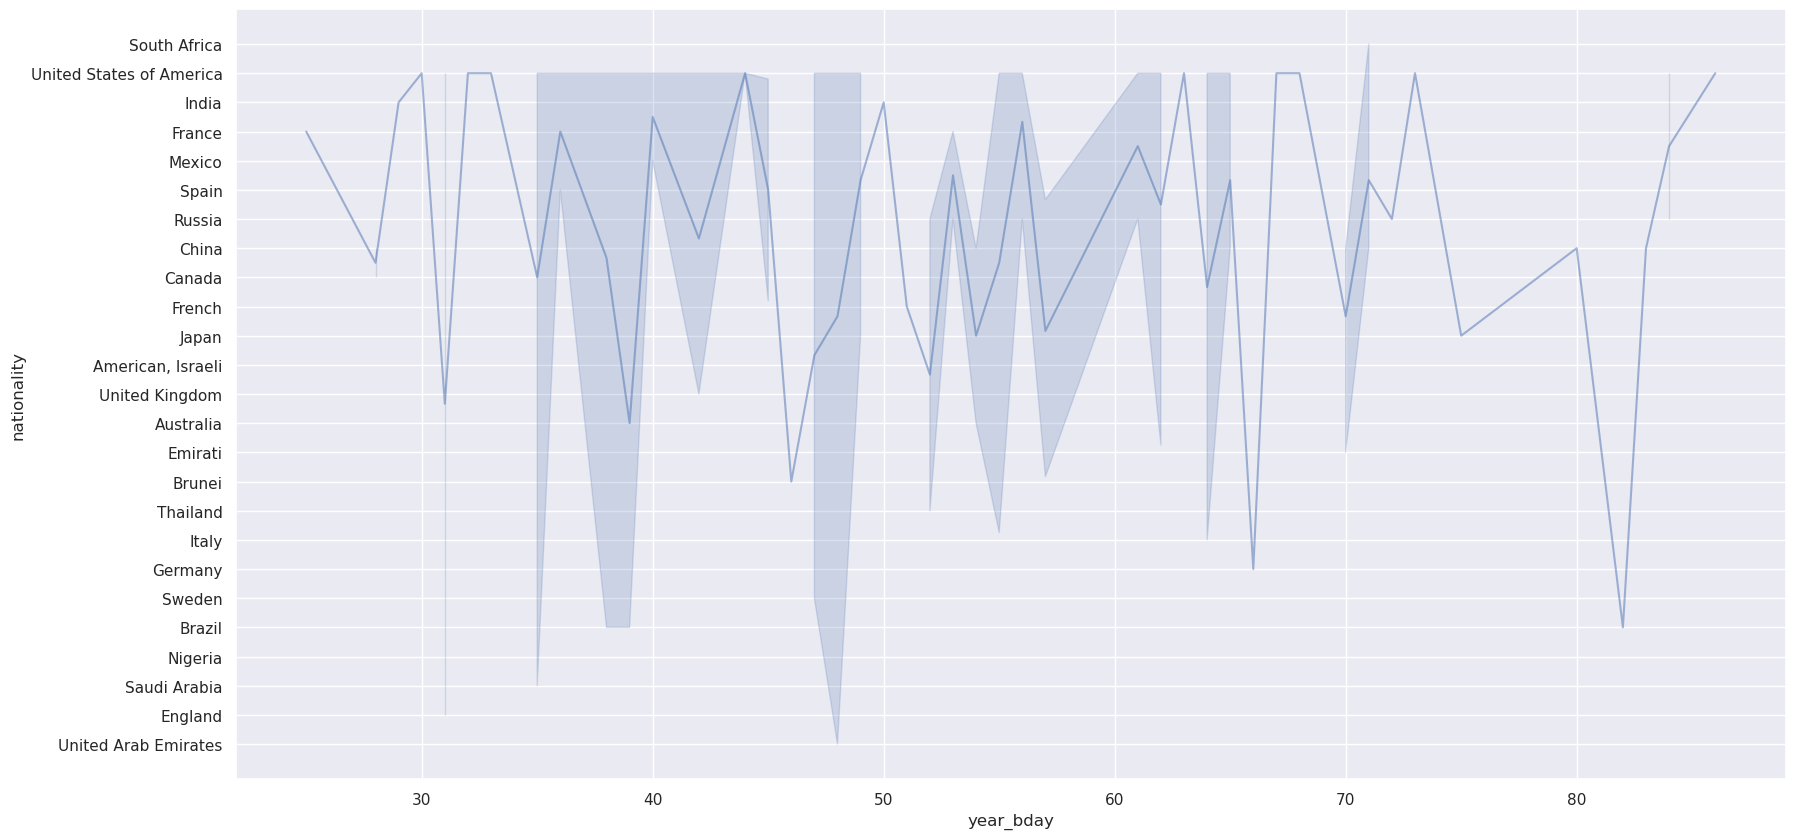

In [97]:
plt.figure(figsize = (20,10))
sns.lineplot(data = df, x = 'year_bday',y= 'nationality',alpha=0.5)
df.sort_values(by='nationality', ascending=False, inplace=True)
plt.savefig("graphics/07-age2.png")
plt.show();

# 12.Correlation plot- EDA

In [98]:
df.corr()

,rank,age,day-bday,year_bday,billion
rank,1.000000,0.045308,-0.198945,-0.037384,-0.787174
age,0.045308,1.000000,0.111856,-0.983154,-0.127726
day-bday,-0.198945,0.111856,1.000000,-0.133114,0.221048
year_bday,-0.037384,-0.983154,-0.133114,1.000000,0.119300
billion,-0.787174,-0.127726,0.221048,0.119300,1.000000


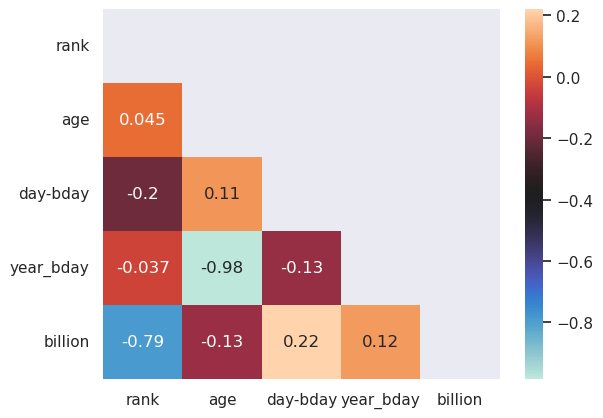

In [99]:
#Correlation plot
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
sns.heatmap(df.corr(), 
           cmap = "icefire", 
            mask = mask,
           annot = True)
plt.savefig("graphics/08-heatmap.png");

In [100]:
df.to_csv('data/02-top_100_richest_clean.csv')